In [2]:
library(ggfortify)
library(devtools)
library(ggplot2)
library(ellipse)
library(cluster)
library(factoextra)
library(EnhancedVolcano)
library(grid)
library(gridExtra)
#library(svglite)
library(genefilter)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,13.39966,10.68396,9.015455,8.543043,7.67598,7.301863,7.019123,6.689368,6.309281,6.056475,5.84249,5.549744,5.332691,4.997827,4.94573,4.181878,2.537752e-14
Proportion of Variance,0.20152,0.12811,0.091220,0.081910,0.06613,0.059840,0.055300,0.050220,0.044680,0.041170,0.03831,0.034570,0.031920,0.028030,0.02745,0.019630,0.000000e+00
Cumulative Proportion,0.20152,0.32963,0.420850,0.502760,0.56889,0.628730,0.684020,0.734250,0.778920,0.820090,0.85840,0.892970,0.924890,0.952920,0.98037,1.000000,1.000000e+00


pdf 
  2

pdf 
  2

pdf 
  2

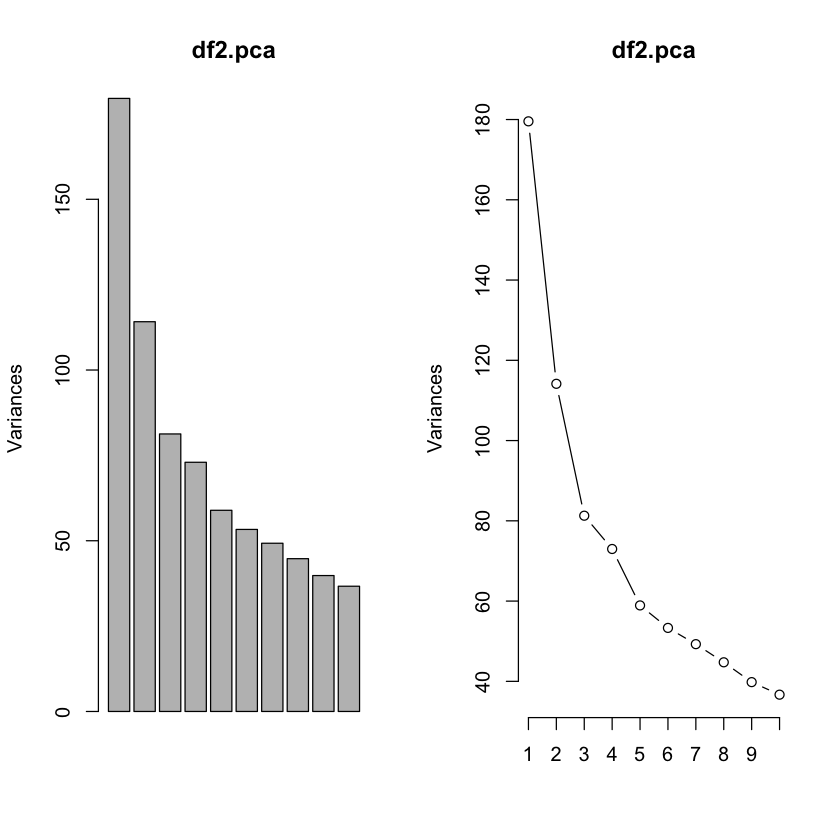

In [29]:
#----------------------------------------------------------------------OPTIMIZED FOR CHAT DEP EXPERIMENTS----------------------------------------------------------------------

#Read data into dataframe
df1 <- read.csv('Census_analysis/Census-DEP-ChatMB-95-annotated.csv')

#Select relevant rows and columns in dataframe then port to new dataframe
row.names(df1) <- df1[,1]
names(df1) <- c("ClusterID","control_1","control_2","control_3","control_4","control_5","control_6","control_7","control_8","control_9","treatment_1","treatment_2","treatment_3","treatment_4","treatment_5","treatment_6","treatment_7","treatment_8","ClusterID2","ID","treatment_C.I.","control_C.I.","Log2foldchange","p.adj","p.val","significant","treatment_vs_control_significant","cluster_representative")
                
# For cuberoot, just divide rowmeans; For log2, subtract rowmeans
#df1[,2:18] <- log(df1[,2:18], 2)
#df1$foldchange <- (rowMeans(df1[c(11:18)], na.rm=TRUE))/(rowMeans(df1[c(2:10)], na.rm=TRUE))
#df1$Log2foldchange <- log(df1$foldchange, 2)
#df1$Log2foldchange <- (rowMeans(df1[c(11:18)], na.rm=TRUE)) - (rowMeans(df1[c(2:10)], na.rm=TRUE))

df2 <- t(df1[,c(2:18)])
                        
#Create PCA object
df2.pca <- prcomp(df2, center=TRUE, scale.=TRUE)

#Output PCA details
layout(matrix(1:2, ncol=2))
screeplot(df2.pca)
screeplot(df2.pca, type="lines")
summary(df2.pca)$importance

#Group samples in PCA object and assign label colors
pch.group <- c(rep(21, times=9), rep(21, times=8))
col.group <- c(rep("red", times=9), rep("blue", times=8))

#Plot PCA
svg(filename="ChatMB-Census-DEP-95-PCA.svg", width = 10, height = 10)
layout(matrix(1:1, ncol=1))
plot(df2.pca$x[,1], df2.pca$x[,2], xlab=paste("PCA 1 (", round(summary(df2.pca)$importance[2]*100, 1), "%)", sep = ""), ylab=paste("PCA 2 (", round(summary(df2.pca)$importance[5]*100, 1), "%)", sep = ""), pch=pch.group, col="black", bg=col.group, cex=2, las=1, asp=1)
abline(v=0, lty=2, col="grey")
abline(h=0, lty=2, col="grey")
#text(df2.pca$x[,1], df2.pca$x[,2], labels=row.names(df2.pca$x), pos=c(1,3,4,2), font=1)
text(df2.pca$x[,1], df2.pca$x[,2], labels=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17), pos=c(1,3,4,2), font=1, cex=1.5)
legend("topleft", legend=c("Control", "Treated"), col="black", pt.bg=c("red", "blue"), pch=c(21, 21), pt.cex=2)
#title(main="title_here")
#Create parameters for elipse rendering of PCA groups
#Get individuals (observations) as a matrix
tab <- matrix(c(df2.pca$x[,1], df2.pca$x[,2]), ncol=2)
#Calculate correlations
c1 <- cor(tab[1:9,])
c2 <- cor(tab[10:17,])
#Plot Elipses
polygon(ellipse(c1*(max(abs(df2.pca$rotation))*200), centre=colMeans(tab[1:9,]), level=.95), col=adjustcolor("pink2", alpha.f=0.25), border="pink")
polygon(ellipse(c2*(max(abs(df2.pca$rotation))*200), centre=colMeans(tab[10:17,]), level=.95), col=adjustcolor("skyblue2", alpha.f=0.25), border="skyblue")
grid(col="lightgray")
dev.off()

# Distance Plot
tiff(filename="ChatMB-Census-DEP-95-Distance.tiff", width = 600, height = 600)
distance <- get_dist(df2)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"), lab_size = 18)
dev.off()

# Volcano Plots
svg(filename="ChatMB-Census-DEP-95-Volcanos.svg", width=20, height=6)
p1 <- EnhancedVolcano(df1, lab = df1$ClusterID, x = 'Log2foldchange', y = 'p.val', xlim = c(-26, 26), pCutoff=0.05, ylim=c(0,28), legendPosition = "right", legendLabels = c('Not Sig.', 'Not Sig., Fold Change >2', 'Sig.', 'Sig., Fold Change >2'), title = "limma p-value", colAlpha = 1)
p2 <- EnhancedVolcano(df1, lab = df1$ClusterID, x = 'Log2foldchange', y = 'p.adj', xlim = c(-26, 26), pCutoff=0.2, ylim=c(0,15), legendPosition = "right", legendLabels = c('Not Sig.', 'Not Sig., Fold Change >2', 'Sig.', 'Sig., Fold Change >2'), title = "limma adjusted p-value", colAlpha = 1)
grid.arrange(p1, p2, nrow=1)
dev.off()

df1[is.na(df1)] <- 1
write.csv(df1, 'ChatMB-Census-DEP-95.csv', row.names=FALSE)

In [5]:
#df1[order(df1$p.adj),]

In [28]:
range(df1$Log2foldchange)
min(df1$p.val)
min(df1$p.adj)

[1] -25.66844  24.57208

[1] 9.766056e-27

[1] 1.182141e-14

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,18.28754,14.25232,10.55127,10.26812,9.228674,9.157802,8.840007,8.198655,7.45003,7.186472,7.057061,6.635167,6.503857,5.031885e-14
Proportion of Variance,0.25490,0.15482,0.08485,0.08036,0.064910,0.063920,0.059560,0.051230,0.04230,0.039360,0.037960,0.033560,0.032240,0.000000e+00
Cumulative Proportion,0.25490,0.40973,0.49458,0.57494,0.639860,0.703780,0.763340,0.814580,0.85688,0.896240,0.934200,0.967760,1.000000,1.000000e+00


pdf 
  2

pdf 
  2

pdf 
  2

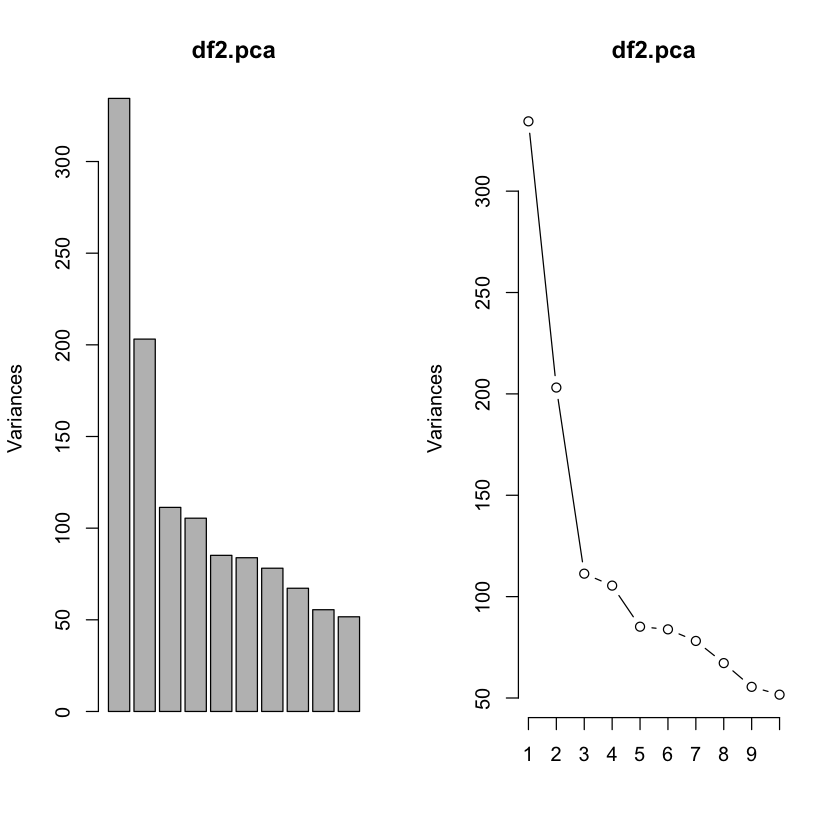

In [52]:
#----------------------------------------------------------------------OPTIMIZED FOR TH DEP EXPERIMENTS----------------------------------------------------------------------

#Read data into dataframe
df1 <- read.csv('Census_analysis/Census-DEP-THMouse-95-annotated.csv')

#Select relevant rows and columns in dataframe then port to new dataframe
row.names(df1) <- df1[,1]
names(df1) <- c("ClusterID","control_1","control_2","control_3","control_4","control_5","control_6","control_7","treatment_1","treatment_2","treatment_3","treatment_4","treatment_5","treatment_6","treatment_7","ClusterID2","ID","treatment_C.I.","control_C.I.","Log2foldchange","p.adj","p.val","significant","treatment_vs_control_significant","cluster_representative")

# For cuberoot, just divide rowmeans; For log2, subtract rowmeans
#df1$foldchange <- (rowMeans(df1[c(9:15)], na.rm=TRUE)) - (rowMeans(df1[c(2:8)], na.rm=TRUE))
#df1$Log2foldchange <- (rowMeans(df1[c(9:15)], na.rm=TRUE)) - (rowMeans(df1[c(2:8)], na.rm=TRUE))
#df1$foldchange <- (rowMeans(df1[c(9:15)], na.rm=TRUE))/(rowMeans(df1[c(2:8)], na.rm=TRUE))
#df1$Log2foldchange <- log(df1$foldchange, 2)

df2 <- t(df1[,c(2:15)])
                        
#Create PCA object
df2.pca <- prcomp(df2, center=TRUE, scale.=TRUE)

#Output PCA details
layout(matrix(1:2, ncol=2))
screeplot(df2.pca)
screeplot(df2.pca, type="lines")
summary(df2.pca)$importance

#Group samples in PCA object and assign label colors
pch.group <- c(rep(21, times=7), rep(21, times=7))
col.group <- c(rep("red", times=7), rep("blue", times=7))

#Plot PCA
svg(filename="THMouse-Census-DEP-95-PCA.svg", width = 10, height = 10)
layout(matrix(1:1, ncol=1))
plot(df2.pca$x[,1], df2.pca$x[,2], xlab=paste("PCA 1 (", round(summary(df2.pca)$importance[2]*100, 1), "%)", sep = ""), ylab=paste("PCA 2 (", round(summary(df2.pca)$importance[5]*100, 1), "%)", sep = ""), pch=pch.group, col="black", bg=col.group, cex=2, las=1, asp=1)
abline(v=0, lty=2, col="grey")
abline(h=0, lty=2, col="grey")
#text(df2.pca$x[,1], df2.pca$x[,2], labels=row.names(df2.pca$x), pos=c(1,3,4,2), font=1)
text(df2.pca$x[,1], df2.pca$x[,2], labels=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14), pos=c(1,3,4,2), font=1, cex=1.5)
legend("topleft", legend=c("Control", "Treated"), col="black", pt.bg=c("red", "blue"), pch=c(21, 21), pt.cex=2)
#title(main="title_here")
#Create parameters for elipse rendering of PCA groups
#Get individuals (observations) as a matrix
tab <- matrix(c(df2.pca$x[,1], df2.pca$x[,2]), ncol=2)
#Calculate correlations
c1 <- cor(tab[1:7,])
c2 <- cor(tab[8:14,])
#Plot Elipses
polygon(ellipse(c1*(max(abs(df2.pca$rotation))*200), centre=colMeans(tab[1:7,]), level=.95), col=adjustcolor("pink2", alpha.f=0.25), border="pink")
polygon(ellipse(c2*(max(abs(df2.pca$rotation))*200), centre=colMeans(tab[8:14,]), level=.95), col=adjustcolor("skyblue2", alpha.f=0.25), border="skyblue")
grid(col="lightgray")
dev.off()

# Distance Plot
tiff(filename="THMouse-Census-DEP-95-Distance.tiff", width = 600, height = 600)
distance <- get_dist(df2)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"), lab_size = 18)
dev.off()

# Volcano Plots
svg(filename="THMouse-Census-DEP-95-Volcanos.svg", width=20, height=6)
p1 <- EnhancedVolcano(df1, lab = df1$ClusterID, x = 'Log2foldchange', y = 'p.val', xlim = c(-6, 6), pCutoff=0.05, ylim=c(0,6), legendPosition = "right", legendLabels = c('Not Sig.', 'Not Sig., Fold Change >2', 'Sig.', 'Sig., Fold Change >2'), title = "limma p-value", colAlpha = 1)
p2 <- EnhancedVolcano(df1, lab = df1$ClusterID, x = 'Log2foldchange', y = 'p.adj', xlim = c(-6, 6), pCutoff=0.2, ylim=c(0,4), legendPosition = "right", legendLabels = c('Not Sig.', 'Not Sig., Fold Change >2', 'Sig.', 'Sig., Fold Change >2'), title = "limma p-adjusted", colAlpha = 1)
grid.arrange(p1, p2, nrow=1)
dev.off()

df1[is.na(df1)] <- 1
write.csv(df1, 'THMouse-Census-DEP-95.csv', row.names=FALSE)

In [3]:
#df1

In [51]:
range(df1$Log2foldchange)
min(df1$p.val)
min(df1$p.adj)

[1] -3.358968  5.148349

[1] 5.434813e-05

[1] 0.001512303